# Parler Data: Users affiliated with far-right militia groups

The objective of this project is to explore the user data scraped from Parler after its shutdown in early January 2021. The data was downloaded from this website (https://zenodo.org/record/4442460#.YEkHNpNKi9Y) which was made available to the public by researchers, https://arxiv.org/pdf/2101.03820.pdf. 

This notebook includes a preliminary analysis of the data to identify trends in joining dates and other data fields. The approximately 13 million users were then filtered to those who specifically mentioned the Proud Boys, Three Percenters, Oath Keepers and/or Boogaloo Bois in their bios. 

This subset of users was exported as a CSV and imported into the twitter-user-search.ipynb notebook for additional analysis. The Twitter account status for usernames in the above subset were determined using Twitter API. The bios and follower counts of Parler usernames with corresponding active Twitter accounts were also pulled from Twitter API.

This notebook includes the preliminary analysis of the entire dataset, as well as an analysis of users that mention a far-right militia group in their bios. 

# Importing tools

In [23]:
import json
import pandas as pd
pd.set_option('display.max_columns', 1000)
import matplotlib
%matplotlib inline
from datetime import datetime
import numpy as np
import re

# Converting JSONs to CSV

The Parler user data is a available online as a series of JSON files, but to make it easier to work with, merge all of the JSONs into a single CSV file, following this guide: https://pandas.pydata.org/docs/user_guide/merging.html

Glob package - pull a bunch of files of the same type.

files = glob.glob(DIRECTORY WITH CSVS/*.json)

dataframes= []

for f in files:
    
    CODE TO OPEN THE FILE TAKING f AS THE VARIABLE
    dataframes.append(result)
 
 total_dataframe = pd.concat(dataframes)
 
 total_dataframe.to_csv(FILEPATH)

# Importing the data

Load the CSV of users, parler_users.csv, and prepare it for analysis. Convert the dates to a readable datetime format. Check null values for date joined to verify that the date parser worked correctly and to ensure future date analysis will not be impeded by missing values. 


In [25]:
custom_date_parser = lambda x: None if pd.isnull(x) else datetime.strptime(str(x), "%Y%m%d%H%M%S")

In [ ]:
df = pd.read_csv('parler_users.csv', 
                 parse_dates = ['joined'], 
                 date_parser=custom_date_parser,
                dtype={'badges':str, 'bio':str, 'datatype':str, 'following':float,
                       'human':str, 'integration':str, 'media':float, 'muted':str, 
                      'posts':str, 'profilePhoto':str, 'verified':str})

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.loc[lambda x: x["joined"].isnull()]

,id,key,badges,banned,bio,blocked,comments,datatype,followed,user_followers,user_following,following,human,integration,isFollowingYou,joined,lastseents,likes,media,muted,pendingFollow,posts,private,profilePhoto,rss,state,userid,username,verified,verifiedComments
24374,aab145b2509c453c9845f401b3f3f3dc,NaN,[],NaN,NaN,NaN,290.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.020646 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
32045,5560ecf606e84c9396953f6e1b11a5df,NaN,[],NaN,NaN,NaN,168.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.596494 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
1476750,55d2e07a7a3e407eb9319369ee1d2c38,NaN,[],NaN,NaN,NaN,0.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.021007 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
1507885,92ce500d58d2431e93921553ee64fe73,NaN,[],NaN,NaN,NaN,486.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.596316 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
1521468,bef743ae10214ca7be582ed1755d2c93,NaN,[],NaN,NaN,NaN,0.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.021393 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
1533087,35fcd92fb70644a7b29c59d67b036f05,NaN,[],NaN,NaN,NaN,57.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.596548 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
2956321,d60722ae231247f4a0a5fac3e9518b7b,NaN,[],NaN,NaN,NaN,127.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.596379 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
2957763,4e434040f31c4582b27df07b0dbab7cf,NaN,[],NaN,NaN,NaN,0.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.020948 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
2964706,bb7ede33b9cf462faf21dfa1636a3652,NaN,[],NaN,NaN,NaN,91.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.021066 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN
2985332,42c6a577dedc44ae9e1931305db4f4a1,NaN,[],NaN,NaN,NaN,382.0,posts,NaN,244.0,71.0,71.0,NaN,NaN,NaN,NaT,2020-11-27 15:01:25.596163 UTC,NaN,0.0,NaN,NaN,56.0,NaN,NaN,NaN,4.0,b1dc3b5d5eb744b28eeef801ed6fb126,Aafa1957,False,NaN


# Filtering data for relevant bios

Create a subset of users that mention support for or affiliation withfar-right militia groups including the Proud Boys, Oath Keepers, Three Percenters and Boogaloo Bois. The Southern Poverty Law Center (SPLC) classifies each of these groups as right-wing extremist militia groups: https://www.splcenter.org/fighting-hate/extremist-files/ideology/antigovernment

Data was manually verified to ensure accounts included in this subset were consistent with the goal of filtering in this manner.

In [9]:
def bio_search(regex_pattern):
    return df.loc[df["bio"].str.contains(regex_pattern, flags=re.IGNORECASE, regex=True, na=False)]

In [11]:
proudboys = bio_search('proud\s?boys?')
oathkeepers = bio_search('oath\s?keeper')
threepercent = bio_search('3 percent|three percent|3%')
boogaloo = bio_search('boogaloo\s?bois?|boogaloo\s?boys?')

In [17]:
filtered_users = pd.concat([proudboys, oathkeepers, threepercent, boogaloo])

In [19]:
filtered_users.to_csv('filtered_users_right.csv', index=None)

# Preliminary data exploration

Analyze badges attached to user accounts and visualize patterns in signups on the platform.

In [20]:
df['date_joined'] = (df['joined']).dt.date

In [21]:
df.date_joined.value_counts(normalize=True).head(20)

2020-11-09    0.109642
2020-11-08    0.103634
2020-11-10    0.056235
2020-11-11    0.044456
2020-11-12    0.030864
2020-11-07    0.028655
2020-11-14    0.025611
2020-11-13    0.019428
2020-11-18    0.019122
2021-01-07    0.017917
2020-11-15    0.017650
2021-01-08    0.016890
2020-06-26    0.016418
2020-11-16    0.014190
2020-06-25    0.013964
2020-06-27    0.012866
2020-11-06    0.012732
2020-06-28    0.012251
2020-06-29    0.011898
2020-07-02    0.011887
Name: date_joined, dtype: float64

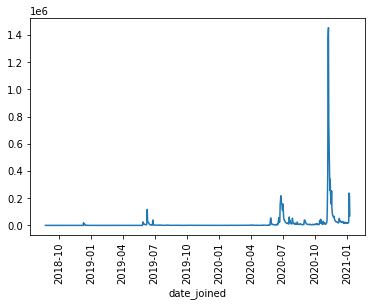

In [22]:
ax = df.groupby("date_joined")["id"].count().plot()
matplotlib.pyplot.xticks(rotation=90)
pass

In [23]:
df.banned.value_counts()

False    12963380
True       287391
Name: banned, dtype: int64

In [24]:
df.verified.value_counts()

False    13253479
True          605
Name: verified, dtype: int64

# Preparing data for Twitter API

Twitter API includes a character limit on usernames. Filter out the usernames that exceed the 16-character limit to streamline the Twitter API process.

In [4]:
right_users = pd.read_csv('filtered_users_right.csv')

In [5]:
right_users['username'] = right_users.username.astype(str)

In [6]:
right_users['username_length'] = right_users['username'].map(lambda x: len(x))

In [7]:
right_short_users = right_users[right_users.username_length < 16]

In [6]:
right_short_users.to_csv('right_short_users.csv')

# Merging API results with original datasets
After creating a text file with the results of the Twitter API query, Save the text file into a CSV, and add column names: username, error_code, error_desc, error_details. Merge with the  filtered dataset used in the Twitter API analysis.

In [9]:
right_results = pd.read_csv("right_api_results.csv")

In [20]:
right_merged = (right_short_users.drop_duplicates(subset=["username"])
                .merge(right_results.drop_duplicates(subset=["username"]), how="left", on="username"))

In [28]:
right_merged.to_csv('right_users_final.csv')

# Creating new dataframes for active and suspended accounts

Create two new dataframes: one for those usernames that have been suspended on Twitter and those whose usernames are still active on Twitter.

# Suspended accounts

Identify the number of users in this subset whose usernames have been suspended on Twitter. For sources and examples in the story, identify users with 10,000 or more followers. 

In [29]:
suspended = right_merged[right_merged.error_desc == 'Forbidden']

In [30]:
suspended.shape

(248, 34)

To identify relevant examples for the story, I sorted the suspended dataframe by number of followers, largest to smallest.

In [31]:
suspended.sort_values(by='user_followers', ascending=False).head(25)

,id,key,badges,banned,bio,blocked,comments,datatype,followed,user_followers,user_following,following,human,integration,isFollowingYou,joined,lastseents,likes,media,muted,pendingFollow,posts,private,profilePhoto,rss,state,userid,username,verified,verifiedComments,username_length,error_code,error_desc,error_details
258,5d484e09b2444c89b0b162cad8404cf1,5d484e09b2444c89b0b162cad8404cf1,[1],NaN,"Creator of Censored.TV, Vice, and the Proud Bo...",False,NaN,user_profile,False,320000.0,115.0,NaN,False,False,NaN,6/18/19 23:53,2020-12-23 14:46:04.413429 UTC,NaN,NaN,False,NaN,NaN,False,14fbf70df1bd403ba10b4c20b95dbd41,False,NaN,5d484e09b2444c89b0b162cad8404cf1,GavinMcInnes,True,False,12,200,Forbidden,User has been suspended: [GavinMcInnes].
442,976d38b4a1a54b33888ed97ca88ca03a,976d38b4a1a54b33888ed97ca88ca03a,[1],NaN,DISAVOWED BOYS - POOR BOYS - Western chauvinis...,False,NaN,user_profile,False,307000.0,457.0,NaN,False,False,NaN,5/30/19 15:12,2020-12-23 14:54:23.522595 UTC,NaN,NaN,False,NaN,NaN,False,6ac5b8e0ab414dad82ebefdeb57c78b7,False,NaN,976d38b4a1a54b33888ed97ca88ca03a,TheProudBoys,True,False,12,200,Forbidden,User has been suspended: [TheProudBoys].
679,d49f59c9484c4ebf9275322e2269facf,d49f59c9484c4ebf9275322e2269facf,[1],False,ProudBoy Chairman\n4th degree\nWarlord\nSuper-...,False,2000.0,user_profile,False,80000.0,1100.0,1100.0,False,False,False,5/30/19 14:31,2020-12-23 15:36:50.310523 UTC,660.0,604.0,False,False,2200.0,False,c68c184c8164473c951ac474b7b9f0b3,False,NaN,d49f59c9484c4ebf9275322e2269facf,NobleLead,True,False,9,200,Forbidden,User has been suspended: [NobleLead].
1170,62c5900c050748cc9a7017b98090764e,62c5900c050748cc9a7017b98090764e,[],False,"TRUMP 2020 MAGA! KAG! KATE STEINLE, I TRACK EV...",False,11000.0,user_profile,False,47000.0,48000.0,48000.0,False,False,False,6/10/19 18:50,2020-12-22 12:58:24.191998 UTC,8000.0,344.0,False,False,9900.0,False,db91a41116774b66a8e3cea276d23916,False,NaN,62c5900c050748cc9a7017b98090764e,FATHEROFESSEN,False,False,13,200,Forbidden,User has been suspended: [FATHEROFESSEN].
323,81ea01c11aca4aa4ba55da698acdca91,81ea01c11aca4aa4ba55da698acdca91,[0],False,Beard god. \nSex symbol.\nCommie smasher. \n4t...,False,1200.0,user_profile,False,24000.0,2400.0,2400.0,True,False,False,6/30/20 9:58,2020-12-22 14:44:33.519118 UTC,301.0,296.0,False,False,707.0,False,471d09120405487d8304c0cd5851f8b4,False,NaN,81ea01c11aca4aa4ba55da698acdca91,Noblebeard,False,False,10,200,Forbidden,User has been suspended: [Noblebeard].
1900,36a35984431d47f697fc4470caa0971a,36a35984431d47f697fc4470caa0971a,[0],False,WITHIN EVERY PATRIOT \nIS A WARRIOR \nCommand ...,False,21000.0,user_profile,False,15000.0,15000.0,15000.0,True,False,False,5/27/20 1:18,2020-12-22 14:28:18.934032 UTC,34000.0,775.0,False,False,4800.0,False,ea6474fc1993448588e0df93e82fd82c,False,NaN,36a35984431d47f697fc4470caa0971a,Punishe3,False,False,8,200,Forbidden,User has been suspended: [Punishe3].
1832,fe23948cd81123aeed2394d6d42dcee1,fe23948cd81123aeed2394d6d42dcee1,[],False,SoCal to SoMo...MERICA 3%!\nSchoolhouse Rock G...,False,1900.0,user_profile,False,9000.0,16000.0,16000.0,False,False,False,12/13/18 2:56,2020-12-21 19:56:37.383238 UTC,17000.0,21.0,False,False,14000.0,False,0f6dee29e9d54ee3acab633ca6c38153,False,NaN,fe23948cd81123aeed2394d6d42dcee1,Ricosraven,False,False,10,200,Forbidden,User has been suspended: [Ricosraven].
443,627b3f158bd240c1ac63a33a490edce7,627b3f158bd240c1ac63a33a490edce7,[],NaN,Proud Boys Western Australia. The sons of West...,False,NaN,user_profile,False,7400.0,141.0,NaN,False,False,NaN,6/26/20 7:41,2020-12-23 14:46:02.411732 UTC,NaN,NaN,False,NaN,NaN,False,d8cf1235311e489a853871daa4276ec6,False,NaN,627b3f158bd240c1ac63a33a490edce7,ProudBoysWA,False,False,11,200,Forbidden,User has been suspended: [ProudBoysWA].
1470,613373c38ced1cdfb6445e9102bc180e,613373c38ced1cdfb6445e9102bc180e,"[9, 0]",False,World Famous- Constitutionally Correct- Vietna...,False,245.0,user_profile,False,7300.0,11000.0,11000.0,True,False,False,12/30/18 2

In [32]:
suspended[suspended.user_followers >= 10000]

,id,key,badges,banned,bio,blocked,comments,datatype,followed,user_followers,user_following,following,human,integration,isFollowingYou,joined,lastseents,likes,media,muted,pendingFollow,posts,private,profilePhoto,rss,state,userid,username,verified,verifiedComments,username_length,error_code,error_desc,error_details
258,5d484e09b2444c89b0b162cad8404cf1,5d484e09b2444c89b0b162cad8404cf1,[1],NaN,"Creator of Censored.TV, Vice, and the Proud Bo...",False,NaN,user_profile,False,320000.0,115.0,NaN,False,False,NaN,6/18/19 23:53,2020-12-23 14:46:04.413429 UTC,NaN,NaN,False,NaN,NaN,False,14fbf70df1bd403ba10b4c20b95dbd41,False,NaN,5d484e09b2444c89b0b162cad8404cf1,GavinMcInnes,True,False,12,200,Forbidden,User has been suspended: [GavinMcInnes].
323,81ea01c11aca4aa4ba55da698acdca91,81ea01c11aca4aa4ba55da698acdca91,[0],False,Beard god. \nSex symbol.\nCommie smasher. \n4t...,False,1200.0,user_profile,False,24000.0,2400.0,2400.0,True,False,False,6/30/20 9:58,2020-12-22 14:44:33.519118 UTC,301.0,296.0,False,False,707.0,False,471d09120405487d8304c0cd5851f8b4,False,NaN,81ea01c11aca4aa4ba55da698acdca91,Noblebeard,False,False,10,200,Forbidden,User has been suspended: [Noblebeard].
442,976d38b4a1a54b33888ed97ca88ca03a,976d38b4a1a54b33888ed97ca88ca03a,[1],NaN,DISAVOWED BOYS - POOR BOYS - Western chauvinis...,False,NaN,user_profile,False,307000.0,457.0,NaN,False,False,NaN,5/30/19 15:12,2020-12-23 14:54:23.522595 UTC,NaN,NaN,False,NaN,NaN,False,6ac5b8e0ab414dad82ebefdeb57c78b7,False,NaN,976d38b4a1a54b33888ed97ca88ca03a,TheProudBoys,True,False,12,200,Forbidden,User has been suspended: [TheProudBoys].
679,d49f59c9484c4ebf9275322e2269facf,d49f59c9484c4ebf9275322e2269facf,[1],False,ProudBoy Chairman\n4th degree\nWarlord\nSuper-...,False,2000.0,user_profile,False,80000.0,1100.0,1100.0,False,False,False,5/30/19 14:31,2020-12-23 15:36:50.310523 UTC,660.0,604.0,False,False,2200.0,False,c68c184c8164473c951ac474b7b9f0b3,False,NaN,d49f59c9484c4ebf9275322e2269facf,NobleLead,True,False,9,200,Forbidden,User has been suspended: [NobleLead].
1170,62c5900c050748cc9a7017b98090764e,62c5900c050748cc9a7017b98090764e,[],False,"TRUMP 2020 MAGA! KAG! KATE STEINLE, I TRACK EV...",False,11000.0,user_profile,False,47000.0,48000.0,48000.0,False,False,False,6/10/19 18:50,2020-12-22 12:58:24.191998 UTC,8000.0,344.0,False,False,9900.0,False,db91a41116774b66a8e3cea276d23916,False,NaN,62c5900c050748cc9a7017b98090764e,FATHEROFESSEN,False,False,13,200,Forbidden,User has been suspended: [FATHEROFESSEN].
1900,36a35984431d47f697fc4470caa0971a,36a35984431d47f697fc4470caa0971a,[0],False,WITHIN EVERY PATRIOT \nIS A WARRIOR \nCommand ...,False,21000.0,user_profile,False,15000.0,15000.0,15000.0,True,False,False,5/27/20 1:18,2020-12-22 14:28:18.934032 UTC,34000.0,775.0,False,False,4800.0,False,ea6474fc1993448588e0df93e82fd82c,False,NaN,36a35984431d47f697fc4470caa0971a,Punishe3,False,False,8,200,Forbidden,User has been suspended: [Punishe3].


# Active accounts

Identify the number of users in this subset whose usernames have active accounts on Twitter. For sources and examples in the story, identify users with 10,000 or more followers. Export a CSV of active users for further analysis with Twitter API.

In [26]:
active = right_merged[right_merged.error_desc == 'account exists']

In [27]:
active.shape

(936, 34)

In [28]:
active.user_followers.sort_values(ascending=False).head(25)

374     112000.0
321      42000.0
733      15000.0
428      13000.0
6        12000.0
1775     10000.0
268       8300.0
996       8000.0
1028      7900.0
1563      7300.0
736       7100.0
549       7100.0
679       7000.0
941       6900.0
1103      6700.0
1653      6600.0
275       6500.0
42        6300.0
258       6100.0
1524      6100.0
777       6000.0
615       6000.0
917       6000.0
1385      6000.0
918       6000.0
Name: user_followers, dtype: float64

In [29]:
active[active.user_followers >= 10000]

,id,key,badges,banned,bio,blocked,comments,datatype,followed,user_followers,user_following,following,human,integration,isFollowingYou,joined,lastseents,likes,media,muted,pendingFollow,posts,private,profilePhoto,rss,state,userid,username,verified,verifiedComments,username_length,error_code,error_desc,error_details
6,8a553cba6a624dcfb57a446ad42edc07,8a553cba6a624dcfb57a446ad42edc07,[],False,❤���� ALL THE WAY WITH THE USA❤���� .TRUMP IS ...,False,1500.0,user_profile,False,12000.0,13000.0,13000.0,False,False,False,7/4/20 12:33,2020-12-21 09:37:34.316567 UTC,1700.0,2.0,False,False,101.0,False,82063b3da87b4fc6b47633da9b94c953,False,NaN,8a553cba6a624dcfb57a446ad42edc07,TRUMPTROOPER,False,False,12,200,account exists,NaN
321,848773072c6f4a10b87371e2c16dcff7,848773072c6f4a10b87371e2c16dcff7,[],False,I follow all back...\nRetired Navy and Trump S...,False,1400.0,user_profile,False,42000.0,50000.0,50000.0,False,False,False,5/31/19 2:47,2020-12-22 18:38:30.004976 UTC,22000.0,21000.0,False,False,79000.0,False,c0f6d8c9d490431088e28d82df7e6bad,False,NaN,848773072c6f4a10b87371e2c16dcff7,NavyCorpsman69,False,False,14,200,account exists,NaN
374,17478285897ba9c892230c846aa29c89,17478285897ba9c892230c846aa29c89,[],NaN,����Colorado CBD����⭐️⭐️⭐️@GenFlynn #TeamSidne...,False,NaN,user_profile,False,112000.0,107000.0,NaN,False,False,NaN,12/16/18 2:11,2020-12-23 14:46:10.121314 UTC,NaN,NaN,False,NaN,NaN,False,5bb93d83f5814179adae2f03453e5c6b,False,NaN,17478285897ba9c892230c846aa29c89,JulieReichwein,False,False,14,200,account exists,NaN
428,92e52f488fe248f8b4649de6a2b24a1e,92e52f488fe248f8b4649de6a2b24a1e,[],False,God first ���� Follower of Christ ✝️ Proud Dep...,False,948.0,user_profile,False,13000.0,14000.0,14000.0,False,False,False,5/29/19 23:10,2020-12-22 14:34:53.309405 UTC,6600.0,1400.0,False,False,9900.0,False,bd714f3503d841c7a2ceaead7119ea45,False,NaN,92e52f488fe248f8b4649de6a2b24a1e,Will25,False,False,6,200,account exists,NaN
733,8d774229c81f4c728d73916c4da8057b,8d774229c81f4c728d73916c4da8057b,[0],False,Trump2020 / God Bless America/ America First /...,False,209.0,user_profile,False,15000.0,29000.0,29000.0,True,False,False,7/15/19 19:54,2020-12-22 04:41:40.351574 UTC,410.0,9.0,False,False,213.0,False,ce39fc0a8024482bbb42ae95495bdf5c,False,NaN,8d774229c81f4c728d73916c4da8057b,TonyPatriot,False,False,11,200,account exists,NaN
1775,94d067552d6642b3a357b0ff834bfb48,94d067552d6642b3a357b0ff834bfb48,[0],False,#TEXAS #MAGA #KAG #PROLIFE President Donald Tr...,False,287.0,user_profile,False,10000.0,10000.0,10000.0,True,False,False,5/30/19 2:10,2020-12-20 22:26:29.131522 UTC,129.0,18.0,False,False,719.0,False,9d70e7453cf74bfab47c82dd63d15cf6,False,NaN,94d067552d6642b3a357b0ff834bfb48,Tombstone1954,False,False,13,200,account exists,NaN


In [30]:
active.to_csv('right_active_users.csv')

# Join Twitter API results to original active user dataframe

Create a CSV of the text file returned by the Twitter API search. Specify the following column names: username, error_code, bio, metrics, followers_count, following_count, tweet_count. Merge the CSV with the above active user dataframe. Export CSV for manual analysis.

In [31]:
right_active_api_results = pd.read_csv('right_active_api_results.csv')

In [32]:
right_active_merged = active.merge(right_active_api_results, how='left', left_on='username', right_on='username')

In [33]:
right_active_merged.to_csv('right_active_twitter_info.csv')

# Finding additional Twitter handles in bios

To locate additional Twitter accounts, search for "Twitter" in the bios of users whose accounts were identified as active or not found through Twitter API. Merge the dataframes and export as CSV to manually identify the account statuses of the handles listed in these bios.

In [36]:
right_active_handle = right_active_merged.loc[right_active_merged["bio_x"].str.contains('Twitter', flags=re.IGNORECASE, regex=True, na=False)]

In [40]:
right_not_found = right_merged[right_merged.error_desc == 'Not Found Error']

In [42]:
right_not_found_handle = right_not_found.loc[right_not_found["bio"].str.contains('Twitter', flags=re.IGNORECASE, regex=True, na=False)]

In [44]:
right_additional_handles = pd.concat([right_not_found_handle, right_active_handle])

In [45]:
right_additional_handles.to_csv('right_additional_handles.csv')